<a href="https://colab.research.google.com/github/Nikita-devel/DS_Hw2_2/blob/main/Hw2_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
import pandas as pd

URL="top50.csv"
df = pd.read_csv(URL)
assert df is not None, "DATA NOT READ FROM THE URL"

In [8]:
df.head()

,Name,Author,User Rating,Reviews,Price,Year,Genre
0,10-Day Green Smoothie Cleanse,JJ Smith,4.7,17350,8,2016,Non Fiction
1,11/22/63: A Novel,Stephen King,4.6,2052,22,2011,Fiction
2,12 Rules for Life: An Antidote to Chaos,Jordan B. Peterson,4.7,18979,15,2018,Non Fiction
3,1984 (Signet Classics),George Orwell,4.7,21424,6,2017,Fiction
4,"5,000 Awesome Facts (About Everything!) (Natio...",National Geographic Kids,4.8,7665,12,2019,Non Fiction


In [9]:
df.shape

(550, 7)

Про скільки книг зберігає дані датасет?
Відповідь: 550

In [10]:
df.columns = ['name', 'author', 'user_rating', 'reviews', 'price', 'year', 'genre']
df.head(1)

,name,author,user_rating,reviews,price,year,genre
0,10-Day Green Smoothie Cleanse,JJ Smith,4.7,17350,8,2016,Non Fiction


In [11]:
df.isna().sum()

name           0
author         0
user_rating    0
reviews        0
price          0
year           0
genre          0
dtype: int64

Чи є в якихось змінних пропуски? (Так / ні)
Відповідь: ні

In [12]:
print(df.nunique())
print(df["genre"].nunique())
print(pd.unique(df["genre"]))
print(list(pd.unique(df["genre"])))

name           351
author         248
user_rating     14
reviews        346
price           40
year            11
genre            2
dtype: int64
2
['Non Fiction' 'Fiction']
['Non Fiction', 'Fiction']


Які є унікальні жанри?
Відповідь: 'Non Fiction', 'Fiction'

<Axes: title={'center': ' розподіл цін'}, ylabel='Frequency'>

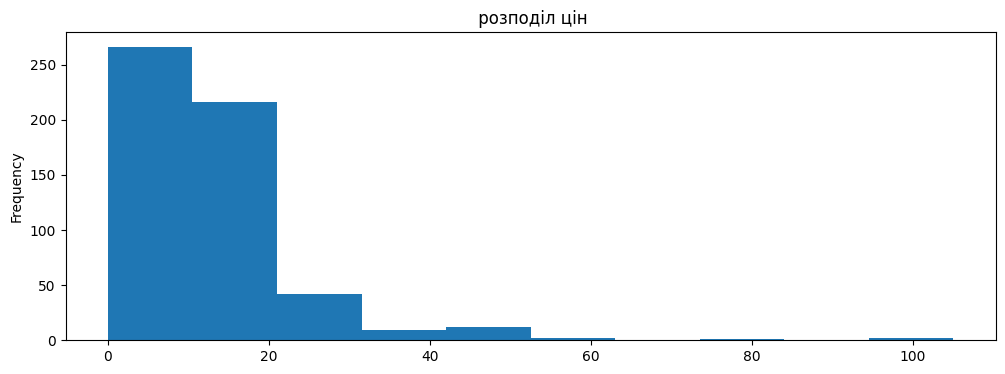

In [13]:
df["price"].plot(figsize=(12,4), title=" розподіл цін", kind="hist")

In [14]:
print("MAX:", df["price"].max())
print("mean:", df["price"].mean())
print("median:", df["price"].median())
print("MIN:", df["price"].min())

MAX: 105
mean: 13.1
median: 11.0
MIN: 0


Максимальна ціна?
Відповідь: 105

Мінімальна ціна?
Відповідь: 0

Середня ціна?
Відповідь: 13.1

Медіанна ціна?
Відповідь: 11

Який рейтинг у датасеті найвищий?
Відповідь: 4.9

In [15]:
df['user_rating'].max()

4.9

In [16]:
max_r = df['user_rating'].max()
df[df['user_rating'] == max_r].shape[0]

52

Скільки книг мають такий рейтинг?
Відповідь: 52

In [17]:
print(df.sort_values(by ="reviews",ascending=False).iloc[0]["name"])
print(df[df["reviews"]==df["reviews"].max()])

Where the Crawdads Sing
                        name       author  user_rating  reviews  price  year  \
534  Where the Crawdads Sing  Delia Owens          4.8    87841     15  2019   

       genre  
534  Fiction  


Яка книга має найбільше відгуків?
'Where the Crawdads Sing'

In [18]:
df.loc[df["reviews"].idxmax()]["name"]

'Where the Crawdads Sing'

З тих книг, що потрапили до Топ-50 у 2015 році, яка книга найдорожча (можна використати проміжний датафрейм)?

In [19]:
top50 = df[df['year'] == 2015].sort_values(by ="user_rating",ascending=False)[:50]

print(top50.sort_values(by ="price",ascending=False).iloc[0]["name"])
print(top50[top50["price"]==top50["price"].max()].iloc[0]["name"])
print(top50.loc[top50["price"].idxmax()]["name"])

Publication Manual of the American Psychological Association, 6th Edition
Publication Manual of the American Psychological Association, 6th Edition
Publication Manual of the American Psychological Association, 6th Edition


Відповідь: "Publication Manual of the American Psychological Association, 6th Edition"

Скільки книг жанру Fiction потрапили до Топ-50 у 2010 році (використовуйте &)?

In [20]:
top50 = df[ (df['year'] == 2010) & (df['genre'] == "Fiction") ].sort_values(by ="user_rating",ascending=False)[:50]
top50.shape[0]

20

Відповідь: 20

Який рейтинг у датасеті найвищий?

In [21]:
top50.iloc[0].user_rating

4.8

Скільки книг з рейтингом 4.9 потрапило до рейтингу у 2010 та 2011 роках (використовуйте | або функцію isin)?

In [23]:
df[ (df['user_rating'] == 4.9) & (df['year'].isin([2010, 2011]) ) ]
query_df = "( user_rating == 4.9 ) & ( year.isin([2010, 2011]) ) "
df.query(query_df)
df.query(query_df).shape[0]

1

І насамкінець, давайте відсортуємо за зростанням ціни всі книги, які потрапили до рейтингу в 2015 році і коштують дешевше за 8 доларів (використовуйте функцію sort_values)

In [24]:
df_tmp = df[ (df['year'] == 2015) & (df['price'] < 8) ].sort_values(by=["price","user_rating"],ascending=[True, False])
df_tmp.tail()

,name,author,user_rating,reviews,price,year,genre
201,Killing Reagan: The Violent Assault That Chang...,Bill O'Reilly,4.6,5235,5,2015,Non Fiction
376,The Four Agreements: A Practical Guide to Pers...,Don Miguel Ruiz,4.7,23308,6,2015,Non Fiction
16,Adult Coloring Book: Stress Relieving Animal D...,Blue Star Coloring,4.6,2925,6,2015,Non Fiction
17,Adult Coloring Book: Stress Relieving Patterns,Blue Star Coloring,4.4,2951,6,2015,Non Fiction
253,Old School (Diary of a Wimpy Kid #10),Jeff Kinney,4.8,6169,7,2015,Fiction


In [25]:
df_tmp.iloc[-1:].iat[0,0]


'Old School (Diary of a Wimpy Kid #10)'

Яка книга остання у відсортованому списку?
Відповідь: "Old School (Diary of a Wimpy Kid #10)"

In [26]:
df[["genre","price"]].groupby("genre").agg(['min', 'max'])


price     
              min  max
genre                 
Fiction         0   82
Non Fiction     0  105

Максимальна ціна для жанру Fiction ?
Відповідь: 82

Мінімальна ціна для жанру Fiction ?
Відповідь: 0

Максимальна ціна для жанру Non Fiction?
Відповідь: 105

Мінімальна ціна для жанру Non Fiction?
Відповідь: 0

In [27]:
df_a = df[["name","author"]].groupby("author").agg("count")
print(type(df_a))
df_a.columns = ["count"]
df_a.head()

<class 'pandas.core.frame.DataFrame'>


,count
author,
Abraham Verghese,2
Adam Gasiewski,1
Adam Mansbach,1
Adir Levy,1
Admiral William H. McRaven,1


In [28]:
df_a.describe()

,count
count,248.000000
mean,2.217742
std,2.046268
min,1.000000
25%,1.000000
50%,1.000000
75%,2.000000
max,12.000000


In [29]:
df_a.describe()["count"]

count    248.000000
mean       2.217742
std        2.046268
min        1.000000
25%        1.000000
50%        1.000000
75%        2.000000
max       12.000000
Name: count, dtype: float64

In [30]:
df_a.sum()

count    550
dtype: int64

In [31]:
df_a["count"].sort_values(ascending=False).head()


author
Jeff Kinney                           12
Gary Chapman                          11
Suzanne Collins                       11
Rick Riordan                          11
American Psychological Association    10
Name: count, dtype: int64

In [32]:
df_a.shape

(248, 1)

Якої розмірності вийшла таблиця?
Відповідь: 248

In [33]:
df_a.idxmax().iloc[0]

'Jeff Kinney'

Який автор має найбільше книг?
Відповідь: "Jeff Kinney"

In [34]:
df_a.loc[df_a.idxmax()].iat[0,0]

12

Скільки книг цього автора?
Відповідь: 12

In [35]:
df_b = df[["author","user_rating"]].groupby("author").agg("mean").sort_values(by = "user_rating")
df_b.head()

,user_rating
author,
Donna Tartt,3.9
Gillian Flynn,4.0
Muriel Barbery,4.0
Gallup,4.0
Ian K. Smith M.D.,4.1


In [36]:
df_b.idxmin().iloc[0]

'Donna Tartt'

У якого автора середній рейтинг мінімальний?
Відповідь: Donna Tartt

In [37]:
df_b.min().iloc[0]

3.9

Який у цього автора середній рейтинг?
Відповідь: 3.9

In [38]:
df_c = pd.concat([df_a,df_b], axis=1)
df_c.columns = ["count", "avg_rating"]
df_c.head()

,count,avg_rating
author,,
Abraham Verghese,2,4.6
Adam Gasiewski,1,4.4
Adam Mansbach,1,4.8
Adir Levy,1,4.8
Admiral William H. McRaven,1,4.7


In [39]:
df_d = df_c.sort_values(['count','avg_rating'], ascending=True)
df_d.head()

,count,avg_rating
author,,
Muriel Barbery,1,4.0
Chris Cleave,1,4.1
Ian K. Smith M.D.,1,4.1
Pierre Dukan,1,4.1
Elizabeth Strout,1,4.2


In [40]:
df_d.index[0]


'Muriel Barbery'

Який автор перший у списку?
Відповідь: Muriel Barbery

In [41]:
%matplotlib inline

import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("darkgrid")

In [42]:
df

,name,author,user_rating,reviews,price,year,genre
0,10-Day Green Smoothie Cleanse,JJ Smith,4.7,17350,8,2016,Non Fiction
1,11/22/63: A Novel,Stephen King,4.6,2052,22,2011,Fiction
2,12 Rules for Life: An Antidote to Chaos,Jordan B. Peterson,4.7,18979,15,2018,Non Fiction
3,1984 (Signet Classics),George Orwell,4.7,21424,6,2017,Fiction
4,"5,000 Awesome Facts (About Everything!) (Natio...",National Geographic Kids,4.8,7665,12,2019,Non Fiction
...,...,...,...,...,...,...,...
545,Wrecking Ball (Diary of a Wimpy Kid Book 14),Jeff Kinney,4.9,9413,8,2019,Fiction
546,You Are a Badass: How to Stop Doubting Your Gr...,Jen Sincero,4.7,14331,8,2016,Non Fiction
547,You Are a Badass: How to Stop Doubting Your Gr...,Jen Sincero,4.7,14331,8,2017,Non Fiction
548,You Are a Badass: How to Stop Doubting Your Gr...,Jen Sincero,4.7,14331,8,2018,Non Fiction


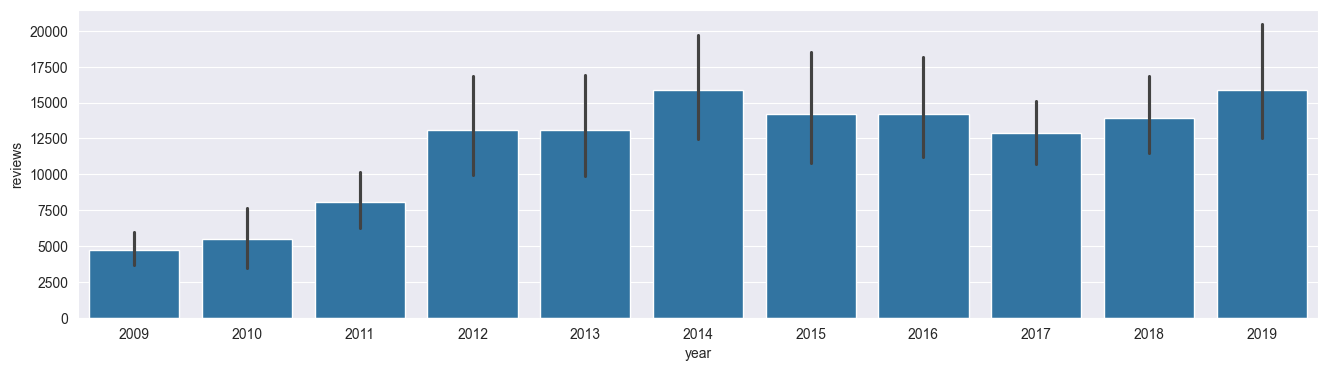

In [43]:
plt.figure(figsize=(16,4))
sns.barplot(data=df, x="year", y="reviews")
plt.show()

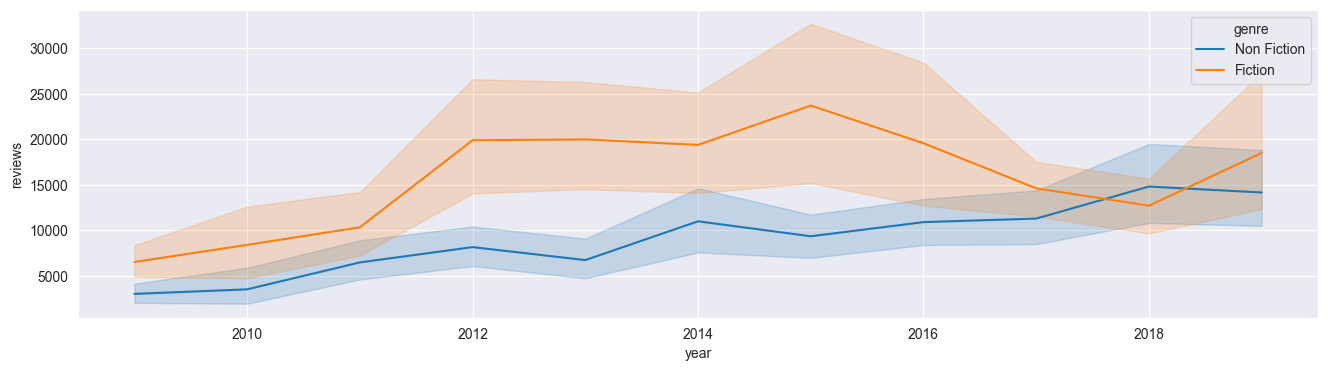

In [44]:
plt.figure(figsize=(16,4))
sns.lineplot(data=df, x="year", y="reviews", hue="genre")
plt.show()

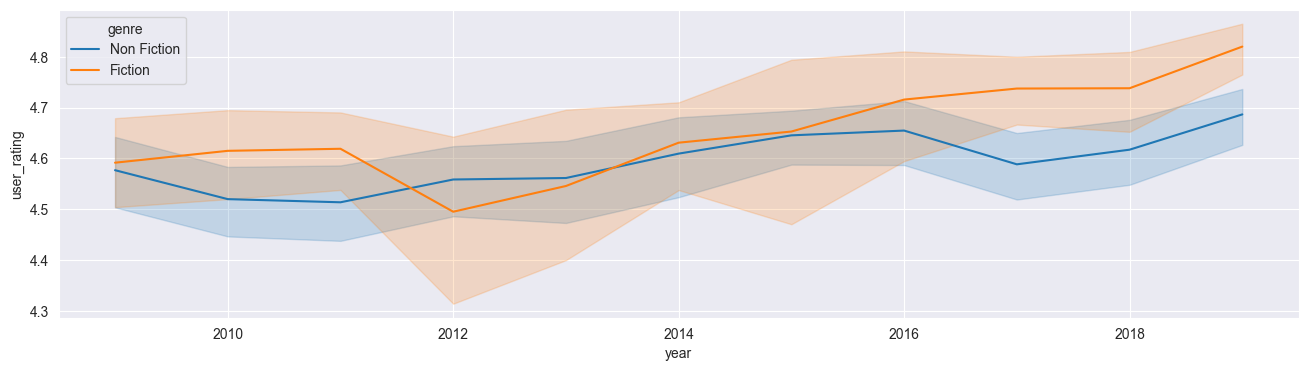

In [45]:
plt.figure(figsize=(16,4))
sns.lineplot(data=df, x="year", y="user_rating", hue="genre")
plt.show()